In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import peak_local_max
from scipy.ndimage import label, maximum_filter
from matplotlib.lines import Line2D
import matplotlib.colors as mcolors
%matplotlib inline

img1 = cv.imread('the_berry_farms_sunflower_field.jpeg', cv.IMREAD_REDUCED_COLOR_4)
img1 = cv.cvtColor(img1, cv.COLOR_BGR2GRAY) / 255



In [3]:
def detect_max(img_log, sigma, threshold=0.09):
    # Apply a maximum filter to find local maxima
    local_max = (img_log == maximum_filter(img_log, footprint=np.ones((3, 3))))

    # Label connected components of local maxima
    labeled_max, num_features = label(local_max)

    # Initialize a list to store coordinates of detected maxima
    coordinates = []

    for label_id in range(1, num_features + 1):
        # Find the coordinates of local maxima for each labeled region
        coords = np.argwhere(labeled_max == label_id)
        max_value = np.max(img_log[coords[:, 0], coords[:, 1]])

        if max_value >= threshold:
            # Add coordinates of local maximum
            coordinates.append(coords[np.argmax(img_log[coords[:, 0], coords[:, 1]])])

    return set(map(tuple, coordinates))

def log(sigma):
    hw = round(3 * sigma)  # Half width of kernel
    x = np.arange(-hw, hw + 1)
    y = np.arange(-hw, hw + 1)
    X, Y = np.meshgrid(x, y)

    # Calculate the LoG kernel directly
    log = (-1 / (np.pi * sigma**4)) * (1 - (X**2 + Y**2) / (2 * sigma**2)) * np.exp(-(X**2 + Y**2) / (2 * sigma**2))

    return log




350 261 0.9999999999999999
189 11 0.9999999999999999
285 230 0.9999999999999999
184 96 0.9999999999999999
183 145 0.9999999999999999
189 325 0.9999999999999999
188 199 0.9999999999999999
188 222 0.9999999999999999
188 347 0.9999999999999999
336 80 0.9999999999999999
186 119 0.9999999999999999
185 122 0.9999999999999999
338 79 0.9999999999999999
193 203 0.9999999999999999
187 127 0.9999999999999999
181 163 0.9999999999999999
207 214 1.9999999999999998
199 85 1.9999999999999998
210 101 1.9999999999999998
196 58 1.9999999999999998
191 231 1.9999999999999998
200 38 1.9999999999999998
198 301 1.9999999999999998
201 181 1.9999999999999998
204 111 1.9999999999999998
209 258 1.9999999999999998
221 72 3.0
207 323 3.0
229 58 3.0
220 177 3.0
198 302 3.0
210 48 3.0
214 91 3.0
214 306 3.0
217 23 3.0
201 243 3.0
228 87 3.0
218 289 3.0
237 347 3.0
252 68 3.0
211 176 3.0
219 353 3.0
201 181 3.0
203 75 3.0
207 323 3.9999999999999996
214 91 3.9999999999999996
222 119 3.9999999999999996
214 306 3.9999999

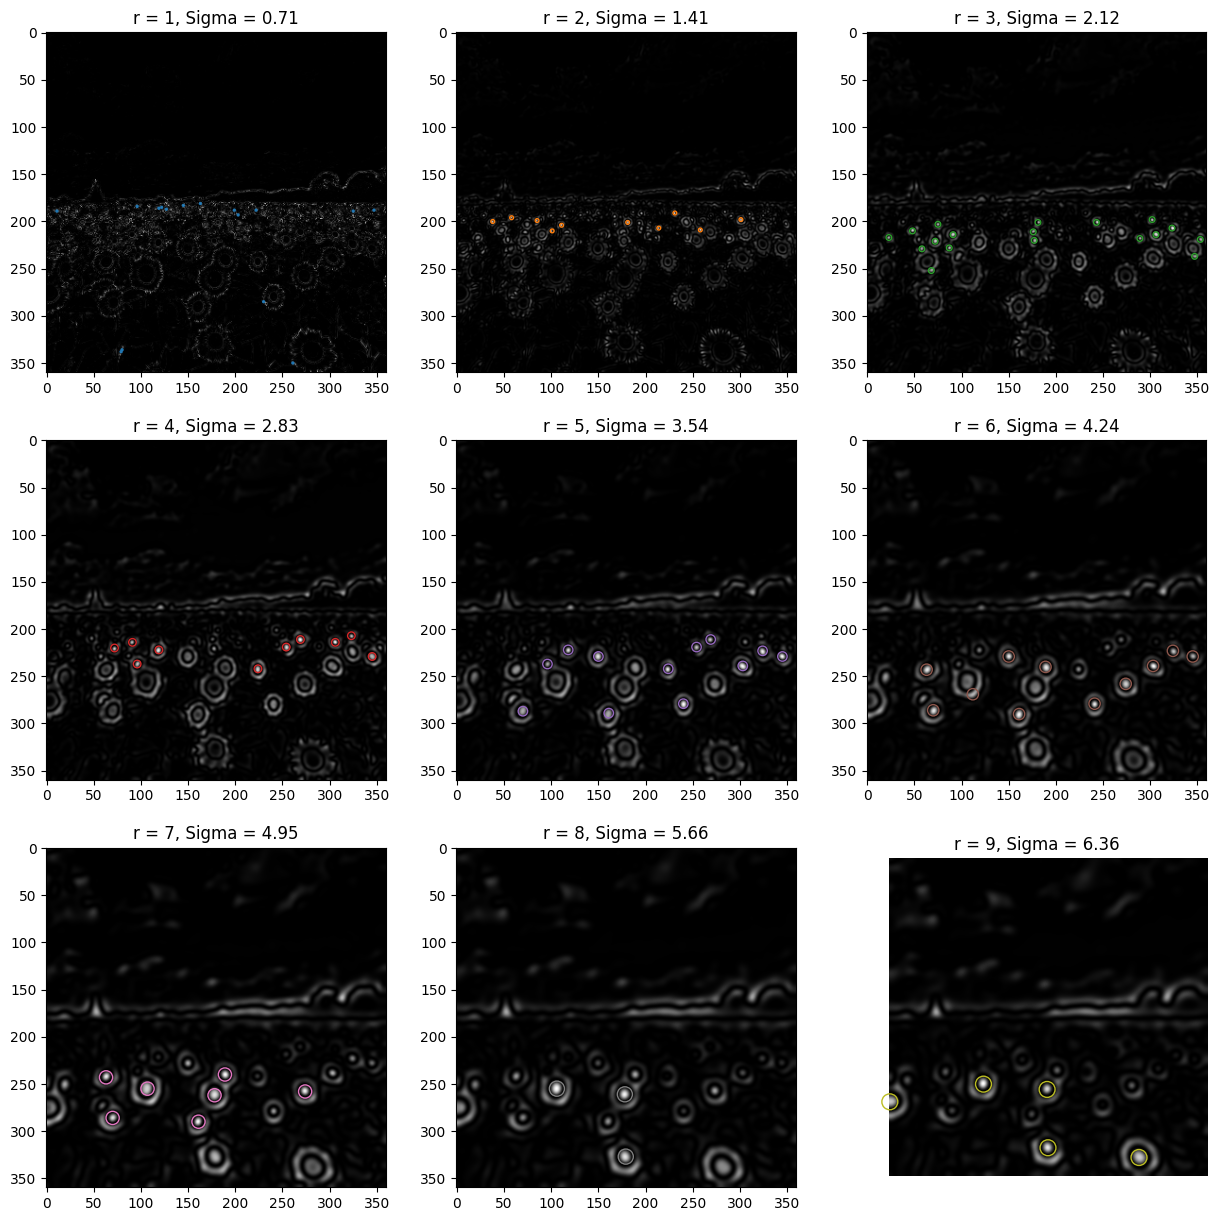

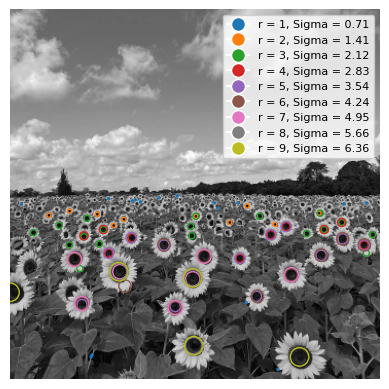

In [4]:
fig, axes = plt.subplots(3, 3, figsize = (15, 15))
colors = list(mcolors.TABLEAU_COLORS)
patches = []
labels = {}

r = 1
flat_axes = axes.flatten()
i = 0
while i < len(flat_axes):
    ax = flat_axes[i]
    sigma = r/1.414
    LOG = sigma**2 * log(sigma)
    img1_log = np.square(cv.filter2D(img1, -1, LOG))

    coordinates = detect_max(img1_log, sigma)

    ax.imshow(img1_log, cmap = 'gray')
    ax.set_title(f'r = {r}, Sigma = {sigma:.2f}')

    for x, y in coordinates:
        c = plt.Circle((y, x), sigma * 1.414, color = colors[r-1], linewidth=1, fill=False)
        ax.add_patch(c)
        patches.append((x, y, sigma * 1.414, colors[r-1]))  # Store the circle parameters instead of the circle itself

    ax.plot()
    labels[f'r = {r}, Sigma = {sigma:.2f}'] = colors[r-1]  # Add labels for each unique radius
    r += 1
    i += 1

plt.axis('off')

fig2, ax2 = plt.subplots()
ax2.imshow(img1, cmap = 'gray')
ax2.grid(False)

legend_elements = []
for i in range(len(patches)):  # Create new circles with the stored parameters
    x, y, radius, color = patches[i]
    print(x,y,radius)
    c = plt.Circle((y, x), radius, color=color, linewidth=1, fill=False)
    ax2.add_patch(c)

ax2.set_xlim(0, img1.shape[1])
plt.axis('off')

# Create a single legend entry for each unique radius
for label, color in labels.items():
    legend_elements.append(Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=color, markersize=10))

ax2.legend(handles=legend_elements, loc='best', fontsize=8)  # Create a single legend outside the loop



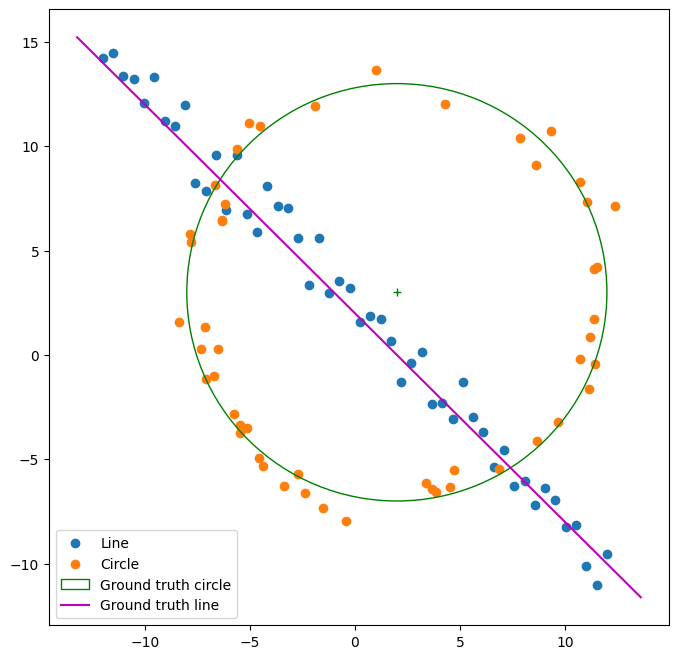

In [14]:
# Generating noisy point set

from scipy.optimize import minimize
from scipy import linalg
import matplotlib.pyplot as plt
import numpy as np
import tikzplotlib

# Set random seed
np.random.seed(0)

# Constants
N = 100
half_n = N // 2

# Parameters
r = 10
x0_gt, y0_gt = 2, 3
s = r / 16
t = np.random.uniform(0, 2 * np.pi, half_n)
n = s * np.random.randn(half_n)
x, y = x0_gt + (r + n) * np.cos(t), y0_gt + (r + n) * np.sin(t)
X_circ = np.hstack((x.reshape(half_n, 1), y.reshape(half_n, 1)))

s, m, b = 1, -1, 2
x = np.linspace(-12, 12, half_n)
y = m * x + b + s * np.random.randn(half_n)
X_line = np.hstack((x.reshape(half_n, 1), y.reshape(half_n, 1)))

X = np.vstack((X_circ, X_line))


fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.scatter(X_line[:, 0], X_line[:, 1], label='Line')
ax.scatter(X_circ[:, 0], X_circ[:, 1], label='Circle')

circle_gt = plt.Circle((x0_gt, y0_gt), r, color='g', fill=False, label='Ground truth circle')
ax.add_patch(circle_gt)
ax.plot(x0_gt, y0_gt, '+', color='g')

x_min, x_max = ax.get_xlim()
x_ = np.array([x_min, x_max])
y_ = m * x_ + b
plt.plot(x_, y_, color='m', label='Ground truth line')

plt.legend()

In [15]:
import numpy as np
from scipy.optimize import minimize

def calc_dist(p1, p2):
    return np.sqrt(np.sum((np.array(p1) - np.array(p2))**2))

def calc_line_eq(p1, p2):
    (x1, y1), (x2, y2) = p1, p2
    a, b, d = y2 - y1, -(x2 - x1), (y2 - y1) * x1 + -(x2 - x1) * y1
    norm = np.sqrt(a**2 + b**2)
    return a / norm, b / norm, d / norm

def calc_error(params, indices, points):
    a, b, d = params
    return np.sum((a * points[indices, 0] + b * points[indices, 1] - d)**2)

def get_inliers(params, threshold, points):
    a, b, d = params
    return np.where(np.abs(a * points[:, 0] + b * points[:, 1] - d) < threshold)

constraint_dict = {'type':'eq', 'fun':lambda params: np.sqrt(params[0]**2 + params[1]**2) - 1}

def fit_line(sample_indices, initial_params, points):
    return minimize(fun=calc_error, x0=initial_params, args=(sample_indices, points), constraints=constraint_dict, tol=1e-6)

iterations = 100
min_sample_points = 2
num_points = X.shape[0]
np.random.seed(14)

threshold = 1.
min_inliers = 0.4 * num_points

best_model_line = best_fitted_line = best_error = best_line_inliers = best_line_sample_points = None
# Initialize best_error to a large number
best_error = np.inf

for i in range(iterations):
    sample_indices = np.random.choice(np.arange(0, num_points), size=min_sample_points, replace=False)
    initial_params = calc_line_eq(X[sample_indices[0]], X[sample_indices[1]])
    inliers = get_inliers(initial_params, threshold, X)[0]

    if len(inliers) >= min_inliers:
        result = fit_line(inliers, initial_params, X)
        # Now this comparison won't raise a TypeError
        if result.fun < best_error:
            best_error = result.fun
            best_model_line = initial_params
            best_fitted_line = result.x
            best_line_inliers = inliers
            best_line_sample_points = sample_indices
line_inliers = get_inliers(best_fitted_line, 1.2, X)[0]
print(f'Best line = {best_fitted_line}, No. of inliers = {len(line_inliers)}, best_error = {best_error}')


Best line = [0.71205467 0.70212402 1.53281698], No. of inliers = 52, best_error = 8.09865025050975


In [16]:
def dist(p1, p2):
    (x1, y1), (x2, y2) = p1, p2
    return ((x1 - x2)**2 + (y1 - y2)**2)**0.5
def circle_eq(p1, p2, p3):
    (x1, y1), (x2, y2), (x3, y3) = p1, p2, p3
    mx1, my1 = (x1 + x2)/2, (y1 + y2)/2
    mx2, my2 = (x1 + x3)/2, (y1 + y3)/2
    s1 = -(x2 - x1)/(y2 - y1)
    s2 = -(x3 - x1)/(y3 - y1)
    c1 = my1 - s1 * mx1
    c2 = my2 - s2 * mx2
    cx = (c2 - c1)/(s1 - s2)
    cy = s1 * cx + c1
    assert abs(s2 * cx + c2 - cy) < 1e-8
    r = dist((cx, cy), p1)
    assert abs(dist((cx, cy), p2) - dist((cx, cy), p1)) < 1e-8
    return cx, cy, r
    
def consensus_circle(params, thres, X):  
    cx, cy, r = params
    errors = np.abs(dist((cx, cy), (X[:, 0], X[:, 1])) - r) 
    return np.where(errors < thres)

def tls_error_circle(params, *args):
    cx, cy, r = params
    indices, X = args
    error = np.sum((dist((cx, cy), (X[indices, 0], X[indices, 1])) - r)**2)
    return error

def least_squares_circ_fit(indices, initial, X):
    res = minimize(fun=tls_error_circle, x0=initial, args=(indices, X), tol=1e-6)
    print(res.x, res.fun)
    return res

def constraint(params): # Should be equal to zero
    a, b, d = params
    return (a**2 + b**2)**0.5 - 1

constraint_dict = {'type':'eq', 'fun':constraint}

remaining_points = np.array([i for i in range(N) if i not in line_inliers])
X_rem = X[remaining_points]

iters = 100
min_points = 3  

thres = 1.2  
d = 0.4 * N 

best_model_circle = None
best_fitted_circle = None
best_error = np.inf
best_circ_inliers = None
best_circ_sample_points = None

for i in range(iters):
    indices = np.random.choice(np.arange(len(X_rem)), size=min_points, replace=False)
    params = circle_eq(*X_rem[indices])
    inliers = consensus_circle(params, thres, X_rem)[0]

    if len(inliers) >= d:  
        res = least_squares_circ_fit(inliers, params, X_rem)
        if res.fun < best_error:
            best_error = res.fun
            best_model_circle = params
            best_fitted_circle = res.x
            best_circ_inliers = inliers
            best_circ_sample_points = indices

circ_inliers = consensus_circle(best_fitted_circle, thres, X_rem)[0]

print(f'Best fit circle = {best_fitted_circle}, N of inliers = {len(circ_inliers)}, best error = {best_error}')

[1.8828232  3.18299016 9.81978826] 8.709305494445344
[1.69665199 3.00402845 9.92790141] 9.203751651287867
[1.81818057 3.07505684 9.97826825] 12.835201704007074
[1.77512491 3.14178349 9.90131913] 8.033794949425614
[1.88662053 2.84905931 9.73824169] 9.714278363734877
[ 1.83009078  3.13554154 10.07761833] 9.557445401322914
[1.7919826  3.02522755 9.74148767] 9.549944511147718
[1.81875531 3.14509641 9.87704621] 9.250674952441745
[1.82101937 2.85187401 9.8098317 ] 11.290842904490663
[1.69665199 3.00402845 9.92790141] 9.203751651287885
[1.88662053 2.84905932 9.73824169] 9.714278363734872
[1.98637561 3.33323219 9.96755549] 9.037442202893756
[1.82394243 2.97629434 9.82797582] 10.582338154521
[1.81875531 3.14509642 9.87704621] 9.250674952441742
Best fit circle = [1.77512491 3.14178349 9.90131913], N of inliers = 45, best error = 8.033794949425614


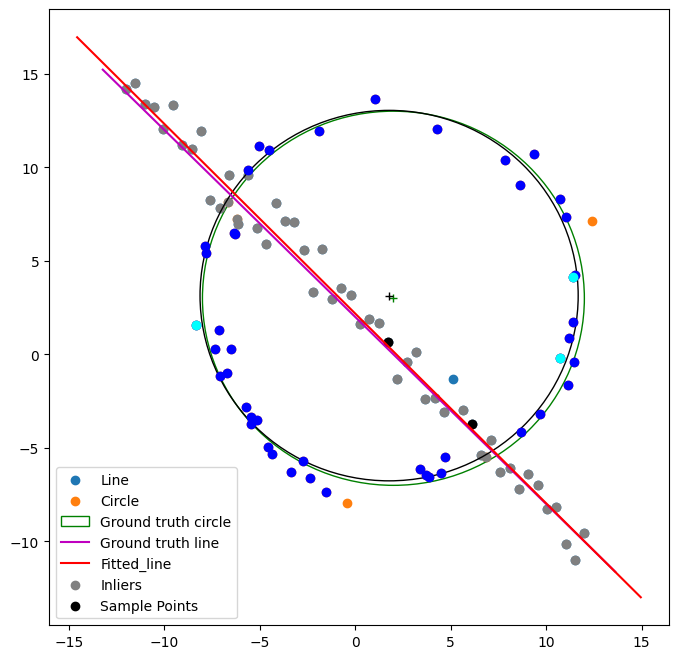

In [17]:

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.scatter(X_line[:, 0], X_line[:, 1], label='Line')
ax.scatter(X_circ[:, 0], X_circ[:, 1], label='Circle')

circle_gt = plt.Circle((x0_gt, y0_gt), r, color='g', fill=False, label='Ground truth circle')
ax.add_patch(circle_gt)
ax.plot(x0_gt, y0_gt, '+', color='g')

x_min, x_max = ax.get_xlim()
x_ = np.array([x_min, x_max])
y_ = m * x_ + b
plt.plot(x_, y_, color='m', label='Ground truth line')

plt.legend()

x_min, x_max = ax.get_xlim()
x_ = np.array([x_min, x_max])
A, B, D = best_fitted_line
indices = line_inliers

y_ = (D - A*x_) / B
plt.plot(x_, y_, color='r', label='Fitted_line')
ax.scatter(X[indices, 0], X[indices, 1], color = 'gray', label = "Inliers")
ax.scatter(X[best_line_sample_points, 0], X[best_line_sample_points, 1], color = 'black', label = "Sample Points")
plt.legend()

x0, y0, r0 = best_fitted_circle
circle_gt = plt.Circle((x0, y0), r0, color='black', fill=False, label='RANSAC circle')
ax.add_patch(circle_gt)
ax.plot(x0, y0, '+', color='black')
ax.scatter(X_rem[circ_inliers, 0], X_rem[circ_inliers, 1], color = 'blue', label = "Circle Inliers")
ax.scatter(X_rem[best_circ_sample_points, 0], X_rem[best_circ_sample_points, 1], color = 'cyan', label = "Sample Points")

